### ### DATASET INFORMATION
**Age**: Age of the patient.

**Sex**: Sex of the patient.

**exang**: Exercise-induced angina (1 = yes; 0 = no).

**Angina** = Chest pain ca: Number of major vessels (0-3). The variable "ca" with values ranging from 0 to 3 represents the number of major blood vessels (coronary arteries) that are colored or visualized during the fluoroscopy procedure. Each value corresponds to a different degree of vessel involvement: ca = 0: Indicates that there is no significant coloration of the vessels, suggesting a potential absence of major vessel blockages. ca = 1: Implies that one major vessel is colored, indicating a partial blockage or disease in one of the coronary arteries. ca = 2: Suggests that two major vessels are colored, signifying a more extensive blockage or disease involving multiple coronary arteries. ca = 3: Indicates that three major vessels are colored, suggesting a severe blockage or disease affecting most of the coronary arteries.

**cp**: Chest pain type.
Typical Angina (Value 1): Substernal discomfort or pain, often squeezing or heaviness, triggered by exertion, indicative of coronary artery disease.
Atypical Angina (Value 2): Non-classic symptoms, variations in pain characteristics, may not be clearly associated with physical exertion.
Non-Anginal Pain (Value 3): Sharp or stabbing pain, not typical of angina, may have non-cardiac causes like musculoskeletal or gastrointestinal issues.
Asymptomatic (Value 4): Absence of chest pain or discomfort, patient reports no symptoms related to chest pain, requiring further assessment of other risk factors.

**trtbps**: Resting blood pressure (in mm Hg).

**chol**: Cholesterol in mg/dl fetched via BMI sensor.

**fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

**rest_ecg**: Resting electrocardiographic results.
Value 0: Normal
Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: Maximum heart rate achieved.

**target**: 0 = Less chance of a heart attack, 1 = More chance of a heart attack.


In [ ]:
import pandas as pd
from IPython.display import display
df = pd.read_csv("/content/heart.csv")
display(df.head(3))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
display(df.describe())


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import seaborn as sns
import numpy as np

### EDA

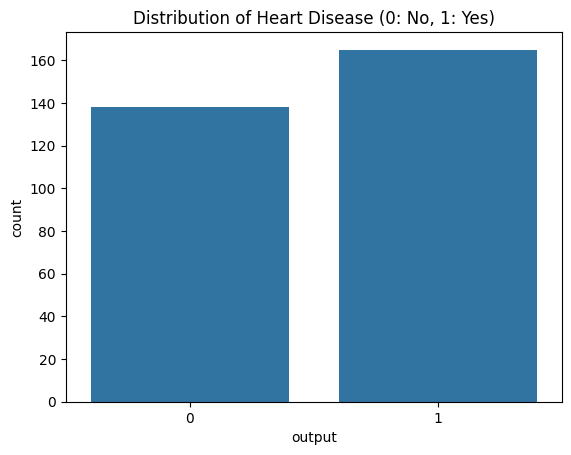

In [ ]:
sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Disease (0: No, 1: Yes)')
plt.show()

Model Balance

In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


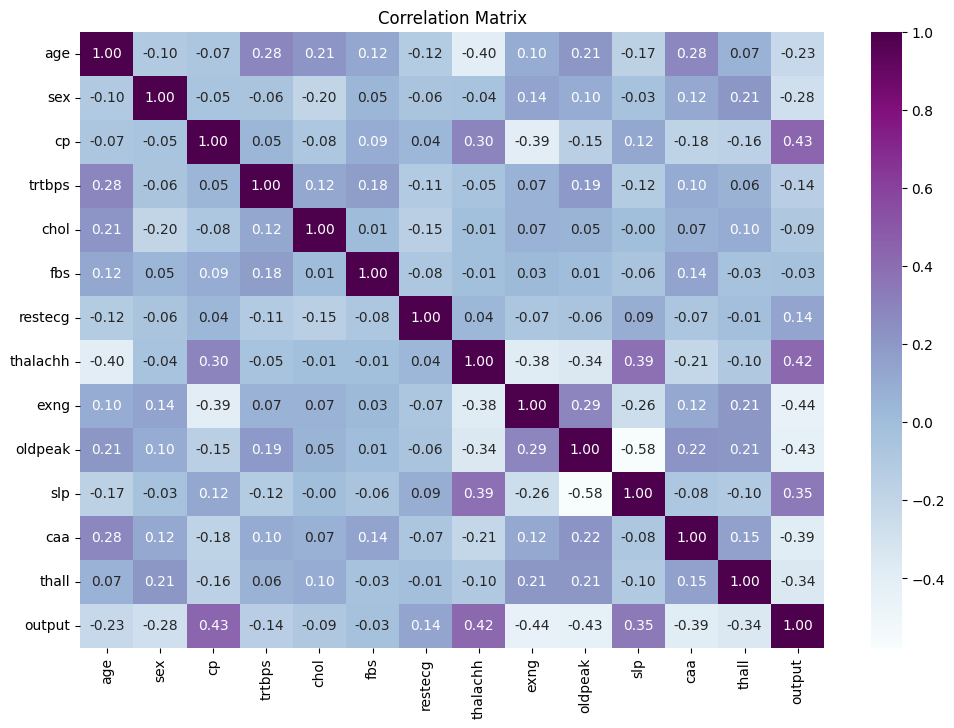

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Heart rate and Chest pain are the most correlative


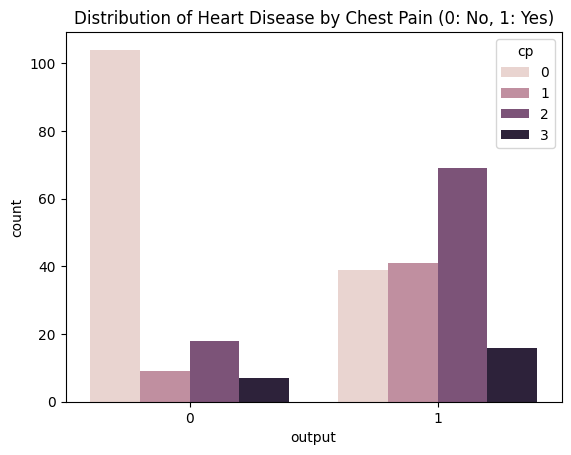

In [ ]:
sns.countplot(x='output', hue = 'cp', data=df)
plt.title('Distribution of Heart Disease by Chest Pain (0: No, 1: Yes)')
plt.show()

### Feature Distribution

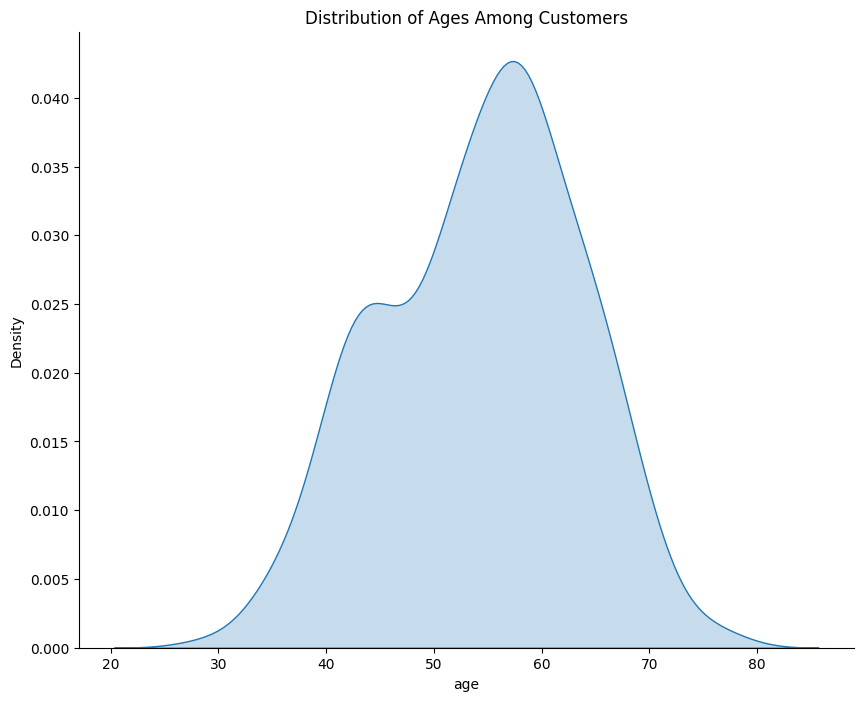

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df.age , fill = True , common_norm=False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

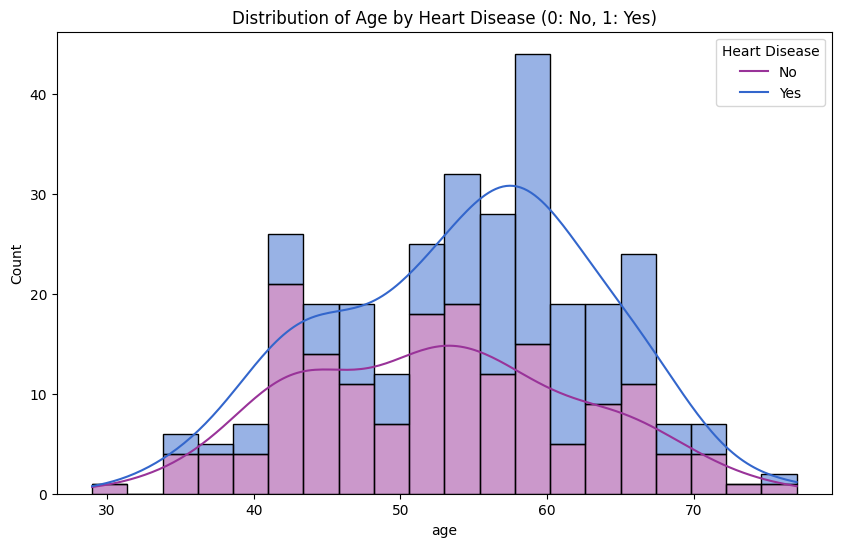

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, bins=20, kde=True, hue='output', multiple='stack', palette=['#3366cc', '#993399'])
plt.title('Distribution of Age by Heart Disease (0: No, 1: Yes)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

The age from 50 to 55 have a highest rate

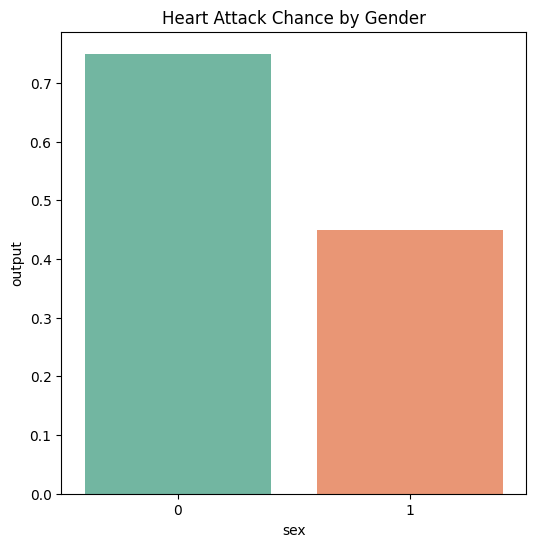

In [ ]:
gender_churn_rate = df.groupby('sex')['output'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')
plt.xlabel('sex')
plt.ylabel('output')
plt.title('Heart Attack Chance by Gender')
plt.show()

### NOISE IDENTIFICATION

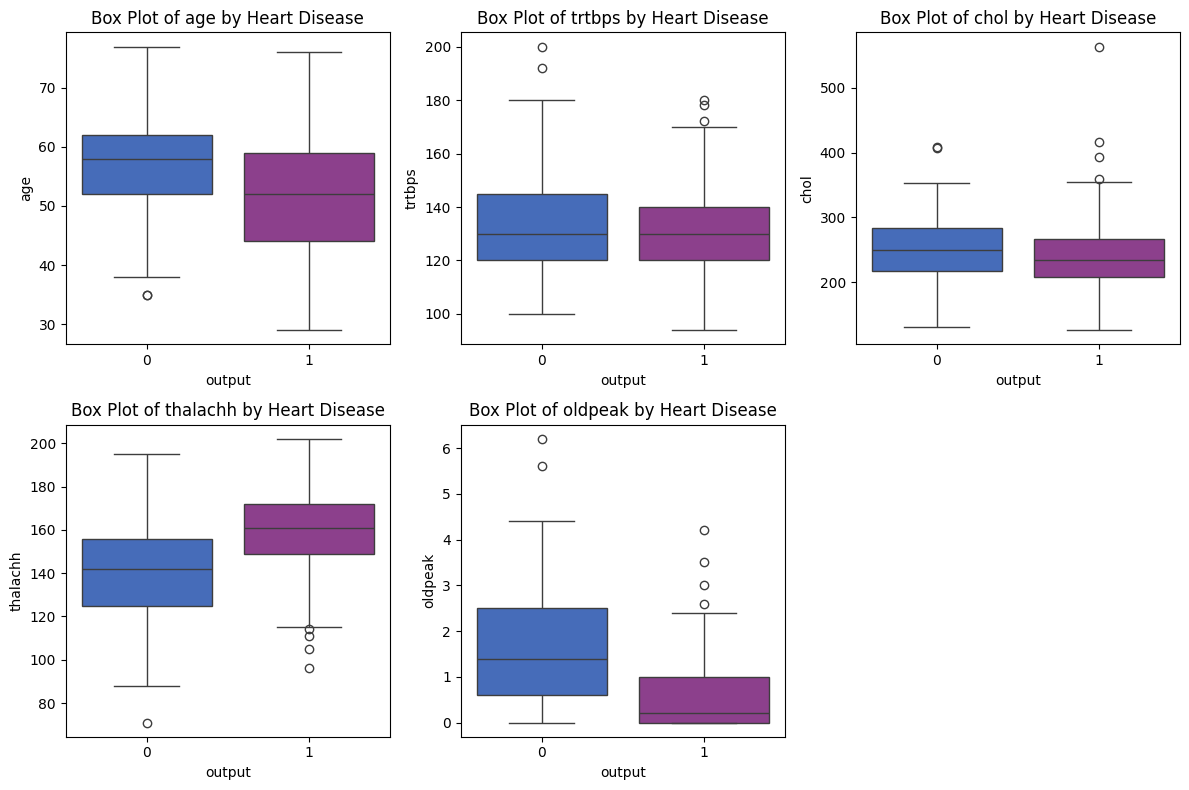

In [ ]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='output', y=feature, data=df, palette=['#3366cc', '#993399'])
    plt.title(f'Box Plot of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

In [ ]:
df = df[df['chol'] <= 500]

Remove chol > 500

### TRAIN TEST SPLIT

In [ ]:
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#MODEL


### LOGISTIC REGRESSION

Logistic Regression Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



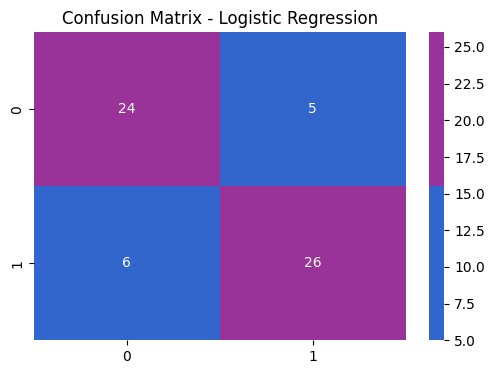

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## RANDOM FOREST

Random Forest Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



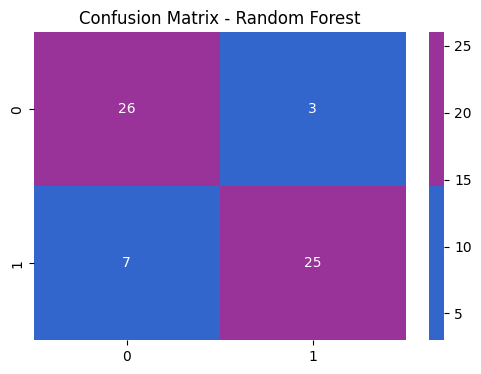

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Random Forest')
plt.show()

## KNN

KNN Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



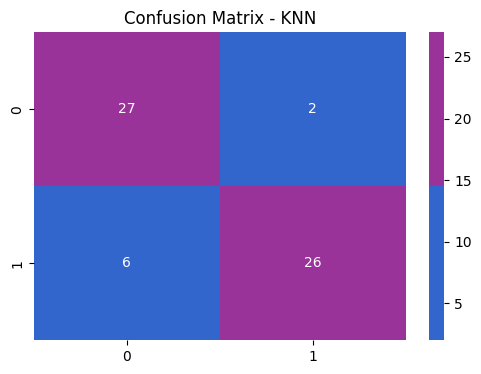

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - KNN')
plt.show()

## DECISION TREE

Accuracy of testing is: 0.7704918032786885
[[24  5]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



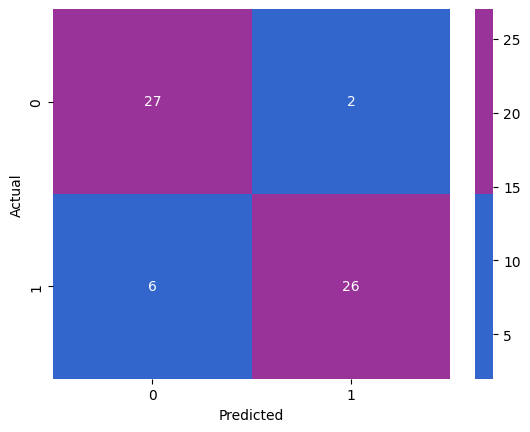

In [ ]:
from sklearn.tree import DecisionTreeClassifier



model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaled, y_train)

import matplotlib.pyplot as plt

y_pred_test = model_dt.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_pred_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

# MODEL SUMMARY

In [ ]:
models = [ 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_knn, acc_test, accuracy_rf, accuracy]

table = PrettyTable()
table.field_names = ["Model", "Accuracy"]

color_codes = {

    'KNN': '\033[33m',  # Orange
    'Decision Tree': '\033[95m',  # Purple
    'Random Forest': '\033[30m',  # Black
    'Logistic Regression': '\033[91m'  # Red
}

for model, accuracy in zip(models, accuracies):

    colored_model = f'{color_codes[model]}{model}\033[0m'
    colored_accuracy = f'{color_codes[model]}{accuracy:.2%}\033[0m'
    table.add_row([colored_model, colored_accuracy])

print(table)

+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
|         KNN         |  86.89%  |
|    Decision Tree    |  77.05%  |
|    Random Forest    |  83.61%  |
| Logistic Regression |  81.97%  |
+---------------------+----------+
